# Redução de Dimensionalidade
## Reduzindo DataSet

### Carrega as bibliotecas e o Iris DataSet

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = load_iris()

### Criando DataFrame

In [2]:
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['target'] = data.target

### Plota a coleção pelos dois primeiros atributos

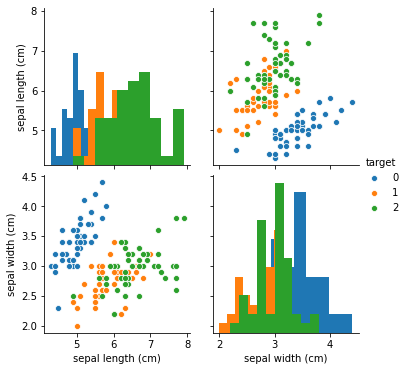

In [3]:
sns.pairplot(
    df, vars=['sepal length (cm)', 'sepal width (cm)'],
    hue='target', diag_kind="hist"
)
plt.show()

### Separa Origem e Destino para passar pelo PCA

In [4]:
X = df.drop('target', 1)
y = df['target']

### Aplica o PCA na Iris DataSet e Plota o Resultado das Variâncias

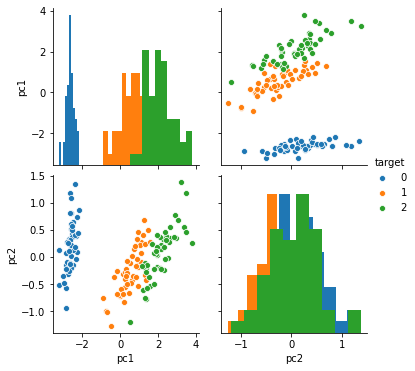

In [5]:
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
new_df = pd.DataFrame(X, columns=['pc1', 'pc2'])
new_df['target'] = y
sns.pairplot(
    new_df, vars=['pc1', 'pc2'],
    hue='target', diag_kind="hist"
)
plt.show()

## Compressão de Imagem

In [6]:
#Carregando a imagem e visualizando dimensões
X = plt.imread('the-painted-bird.jpg')
X.shape

(698, 1240, 3)

In [7]:
pca = PCA()
lower_dimension_data = pca.fit_transform(np.reshape(X, (3*698, 1240)))
lower_dimension_data.shape

(2094, 1240)

In [8]:
def pca_with_var_exp(X, var_exp=0.99):
    pca = PCA(var_exp)
    lower_dimension_data = pca.fit_transform(X)
    print(lower_dimension_data.shape)
    approximation = pca.inverse_transform(lower_dimension_data)
    return approximation

def plot_subplot(X, i):
    plt.subplot(3,2,i)
    plt.imshow(X, cmap="gray")
    plt.xticks([])
    plt.yticks([])

In [9]:
X_reshaped = np.reshape(X, (3*698, 1240))
img_1 = pca_with_var_exp(X_reshaped, var_exp=0.99)
img_2 = pca_with_var_exp(X_reshaped, var_exp=0.95)
img_3 = pca_with_var_exp(X_reshaped, var_exp=0.90)

(2094, 106)
(2094, 29)
(2094, 10)


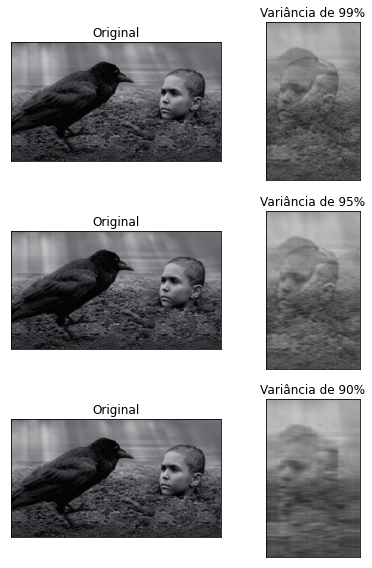

In [10]:
#Visualizando aproximações
plt.figure(figsize=(6,8))

plot_subplot(X, 1)
plt.title("Original")

plot_subplot(img_1, 2)
plt.title("Variância de 99%")

plot_subplot(X, 3)
plt.title("Original")

plot_subplot(img_2, 4)
plt.title("Variância de 95%")

plot_subplot(X, 5)
plt.title("Original")

plot_subplot(img_3, 6)
plt.title("Variância de 90%")

plt.tight_layout()
plt.show()